# Hainich with ERA-Interim controls

In [ ]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/simone/anaconda3/envs/data-science/lib/python3.10/site-packages/fastai/callback/core.py:69: UserWarning: You are shadowing an attribute (__class__) that exists in the learner. Use `self.learn.__class__` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")


In [ ]:
from meteo_imp.kalman.fastai import *
from meteo_imp.kalman.filter import *
from meteo_imp.utils import *
from meteo_imp.data import *

from fastai.tabular.learner import *
from fastai.learner import *
from fastai.callback.all import *

from meteo_imp.kalman.fastai import show_results
import pandas as pd
import numpy as np
import torch

In [ ]:
hai = pd.read_parquet(hai_path)
hai64 = pd.read_parquet(hai_path64)
hai_era = pd.read_parquet(hai_era_path)
hai_era64 = pd.read_parquet(hai_era_path64)

In [ ]:
dls = imp_dataloader(hai64, hai_era64, var_sel = gen_var_sel(['TA', 'SW_IN', 'VPD']), block_len=200, gap_len=gen_gap_len(10, min_v=3), bs=20, control_lags=[1])

In [ ]:
# dls = imp_dataloader(hai64, hai_era64, var_sel = gen_var_sel(['TA', 'SW_IN', 'VPD']), block_len=200, gap_len=10, bs=20, control_lags=[1])

In [ ]:
model = KalmanFilter.init_random(n_dim_state = hai.shape[1], n_dim_obs=hai.shape[1], n_dim_contr=hai_era.shape[1] * 2, dtype=torch.float64).cuda()

## Simple training

In [ ]:
loss_func_ng = loss_func=KalmanLoss(only_gap=False)
learn = Learner(dls, model, loss_func_ng, cbs=[ShowGraphCallback, Float64Callback], metrics=[rmse_mask, r2_mask])

epoch,train_loss,valid_loss,rmse,r2,time
0,607.058369,515.446269,0.366365,-18.953901,01:39
1,475.921415,359.786886,0.180804,-1.877576,01:49
2,348.836041,215.060710,0.133364,-0.778128,01:59
3,213.805165,71.989816,0.132907,-1.213813,02:04
4,84.765372,-51.247118,0.119912,-0.064529,02:07
5,-41.113329,-182.953342,0.075950,0.661874,02:08
6,-169.925174,-311.168974,0.064809,-0.035979,02:04
7,-295.206480,-432.871735,0.063802,0.936280,02:04
8,-424.575996,-562.614567,0.048965,0.908722,01:59
9,-545.755660,-679.265734,0.045273,0.648892,02:00


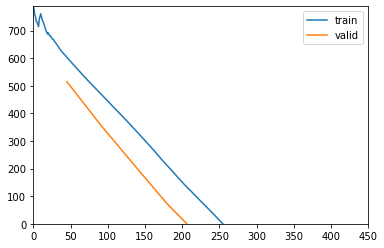

In [ ]:
learn.fit(10, 2e-2)

In [ ]:
show_results(learn)

alt.HConcatChart(...)

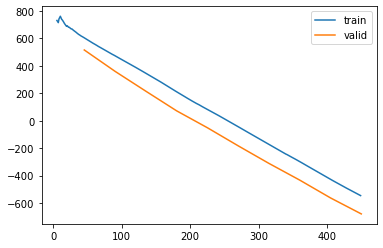

In [ ]:
learn.recorder.plot_loss()

epoch,train_loss,valid_loss,rmse,r2,time
0,-701.508009,-719.499257,0.042491,0.364471,01:46
1,-733.036040,-751.966214,0.039660,0.615754,01:51
2,-766.875790,-802.134089,0.037965,0.984316,01:46
3,-802.225402,-842.992511,0.034145,0.977250,01:44
4,-840.689974,-884.280286,0.040979,0.983124,01:53
5,-880.406406,-921.259744,0.036642,0.871848,01:45
6,-920.637857,-965.865153,0.034881,0.975765,01:47
7,-960.791818,-1002.702275,0.034850,0.629993,01:49
8,-1003.434672,-1048.419952,0.031607,0.975755,01:48
9,-1035.639274,-1066.565967,0.040136,0.435163,01:50


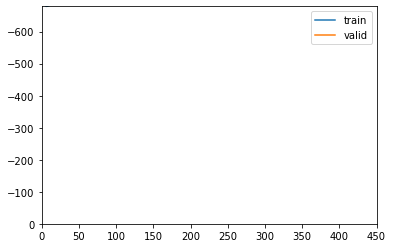

In [ ]:
learn.fit(10, 7e-3)

In [ ]:
show_results(learn)

alt.HConcatChart(...)

train only on gap

In [ ]:
learn.loss_func =  KalmanLoss(only_gap=True)

In [ ]:
show_results(learn)

alt.HConcatChart(...)

epoch,train_loss,valid_loss,rmse,r2,time
0,-0.005931,-2.003364,0.030327,0.985116,01:14
1,-1.177973,-3.447589,0.029919,0.704350,01:16
2,-1.061323,0.247962,0.034471,0.881624,01:22
3,-1.619825,-0.819893,0.031246,0.990277,01:17
4,-2.642889,-2.878098,0.031077,-0.946337,01:18
5,-3.325557,2.120081,0.038847,0.991815,01:20
6,-4.295325,-1.668097,0.035035,0.985702,01:18
7,-2.293203,-0.351283,0.033916,0.910861,01:19
8,-2.816982,-2.604867,0.031628,0.669590,01:19
9,-2.989582,-2.357790,0.032688,0.983338,01:17


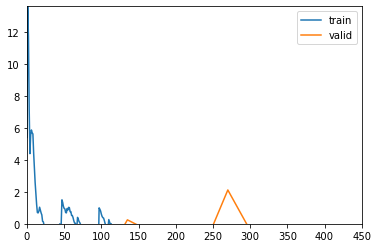

In [ ]:
learn.fit(10, 7e-3)

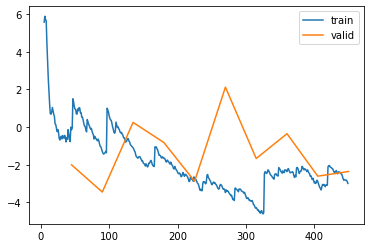

In [ ]:
learn.recorder.plot_loss()

In [ ]:
learn.metrics = [mk_metric(]

(#2) [<fastai.learner.AvgMetric object>,<fastai.learner.AvgMetric object>]

In [ ]:
show_results(learn)

alt.HConcatChart(...)

In [ ]:
learn

In [ ]:
# learn.save("trained_hainich_control_9_jan_v1")

Path('models/trained_hainich_control_9_jan_v1.pth')

## Multiple losses training

In [ ]:
inp, targ = dls.one_batch()
inp[0].eq(targ[0]).all()
inp[1].all(1).all(1).any()

tensor(False, device='cuda:0')

In [ ]:
inp[1].all(1).all(1)

tensor([False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False],
       device='cuda:0')

In [ ]:
inp[1][18].all()

tensor(False, device='cuda:0')

In [ ]:
for _ in range(100):
    inp, targ = dls.one_batch()
    assert not inp[1].all(1).all(1).any()

In [ ]:
loss_func_g = loss_func=KalmanLoss(only_gap=True)
learn = Learner(dls, model, loss_func_g, cbs=[ShowGraphCallback, Float64Callback], metrics=imp_metrics)

epoch,train_loss,valid_loss,rmse,rmse_gap,r2,r2_gap,time
0,35.681259,25.316821,0.569263,0.675936,-11.686040,-4623607617801388104142699888640.000000,01:11
1,28.467558,23.233029,0.524849,0.610395,-2.279983,-2785450798303600881197612269568.000000,01:12
2,24.512202,21.556061,0.508569,0.522891,-1.991859,-1787686587625842508214908747776.000000,01:17
3,22.205898,18.522426,0.504695,0.497300,-2.575984,-2311579056314112802293087731712.000000,01:14
4,19.906797,16.373493,0.532846,0.453842,-1.954186,-2977305927889536455278742994944.000000,01:13


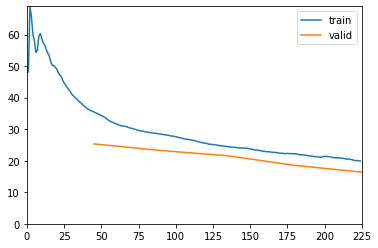

In [ ]:
learn.fit(5, 2e-2)

In [ ]:
learn

In [ ]:
show_results(learn)

alt.HConcatChart(...)

In [ ]:
learn.model.use_smooth = False

epoch,train_loss,valid_loss,rmse,rmse_gap,r2,r2_gap,time
0,98.515476,76.464946,3.587664,9.146169,-556.182098,-1785660235166445426744542481088512.000000,00:53
1,65.572638,42.698891,1.761536,4.240729,-961.723482,-978013546570620530329106643943424.000000,00:56
2,55.393772,45.721459,1.547412,3.812272,-358.409783,-482895226247397956117409612955648.000000,00:58
3,50.176197,45.659879,1.704954,4.215966,-1291.738173,-256935436439301020515829859483648.000000,01:01
4,48.109062,50.373996,1.703977,4.298851,-94.260413,-526513865521285616344450662924288.000000,00:56


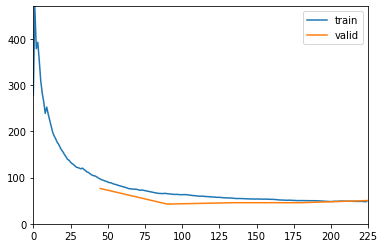

In [ ]:
learn.fit(5, 2e-2)

In [ ]:
learn

In [ ]:
learn.use_smooth = True

In [ ]:
show_results(learn)

alt.HConcatChart(...)